# MENTAL HEALTH SURVEY

## LOADING DATA AND LIBRARIES

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
survey = pd.read_csv('../input/survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
print(survey.shape)
print(survey.dtypes)

(1259, 27)
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


## CHECKING MISSING VALUES

In [3]:
survey.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [4]:
survey.drop(['Timestamp','comments'], axis=1, inplace=True)
print(survey.columns)

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


## EXPLORING RESPONDENTS

## WHICH COUNTRY CONTRIBURES THE MOST ?

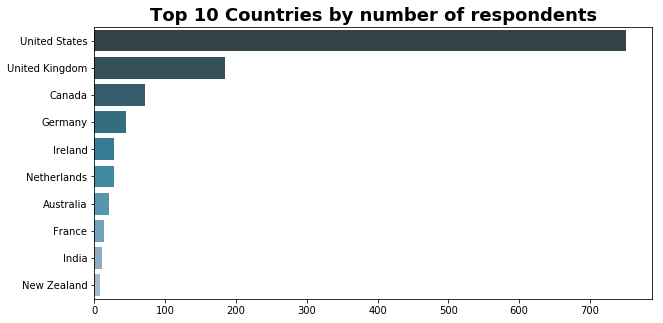

In [5]:
top_10_countries = survey['Country'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_countries['Country'],top_10_countries.index,palette="PuBuGn_d")
plt.title('Top 10 Countries by number of respondents',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

As from the above plot it can be seen that US contributed the most with __751__ respondents and now further exploring the states of US

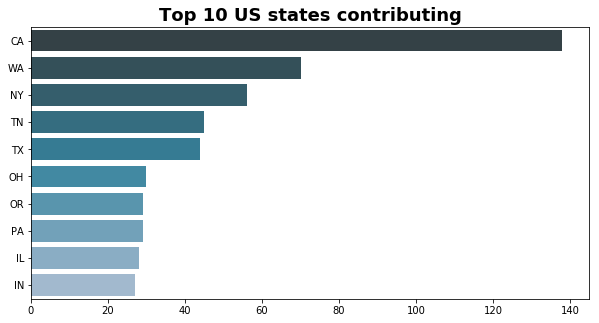

In [6]:
usa = survey.loc[survey['Country'] == 'United States']
top_10_statesUS = usa['state'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_statesUS['state'],top_10_statesUS.index,palette="PuBuGn_d")
plt.title('Top 10 US states contributing',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

__CALIFORNIA__ is the state contributing the most in the survey with __138__ respndents.

## TAKING A LOOK AT THE AGE OF RESPONDENTS

__Age__ has some negative and out of range values fixing those values.

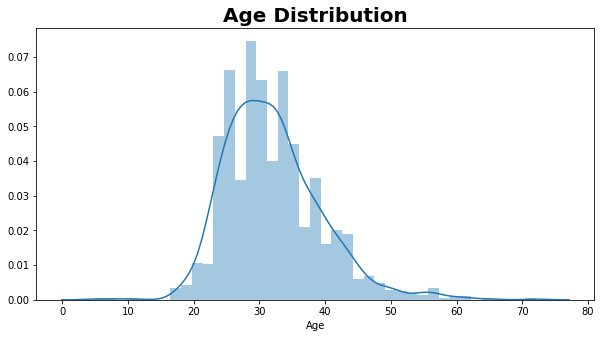

In [7]:
def clean_age(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
survey['Age'] = survey['Age'].apply(clean_age)
plt.figure(figsize=(10,5))
sns.distplot(survey['Age'].dropna())
plt.title("Age Distribution",fontsize=20,fontweight="bold")
plt.show()

In [8]:
age = survey.loc[survey['treatment'] == 'Yes']
age['Age'].value_counts().nlargest(1)
print("32 years is the age in which person take mental treatment.")

32 years is the age in which person take mental treatment.


## GENDER EXPLORATION

Cleaning up the gender column. 

In [9]:
survey['Gender'] = survey['Gender'].str.lower()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
survey['Gender'] = survey['Gender'].apply(lambda x:"Male" if x in male else x)
survey['Gender'] = survey['Gender'].apply(lambda x:"Female" if x in female else x)
survey['Gender'] = survey['Gender'].apply(lambda x:"Trans" if x in trans else x)
survey.drop(survey[survey.Gender == 'p'].index, inplace=True)
survey.drop(survey[survey.Gender == 'a little about you'].index, inplace=True)

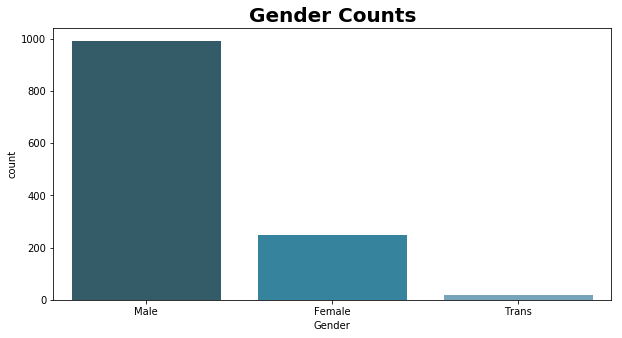

In [10]:
plt.figure(figsize=(10,5))
sns.countplot('Gender',data = survey, order = survey['Gender'].value_counts().index,palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=20,fontweight="bold")
plt.show()

## HOW MANY OF THEM ARE TAKING TREATMENT ?

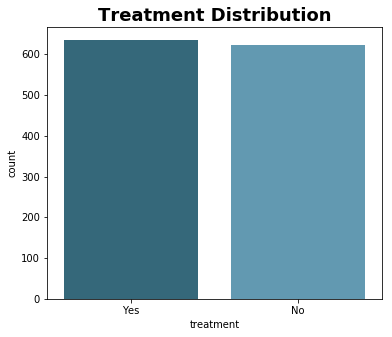

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(survey['treatment'],palette="PuBuGn_d")
plt.title("Treatment Distribution",fontsize=18,fontweight="bold")
plt.show()

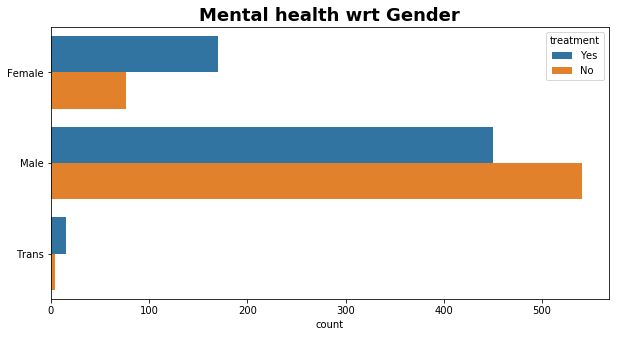

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(y="Gender", hue="treatment", data=survey)
plt.title("Mental health wrt Gender",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()

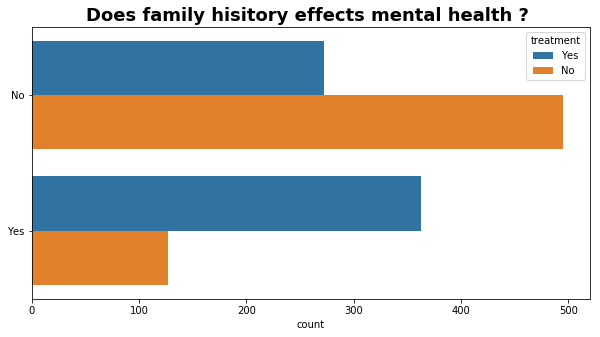

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(y="family_history", hue="treatment", data=survey)
plt.title("Does family hisitory effects mental health ? ",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()

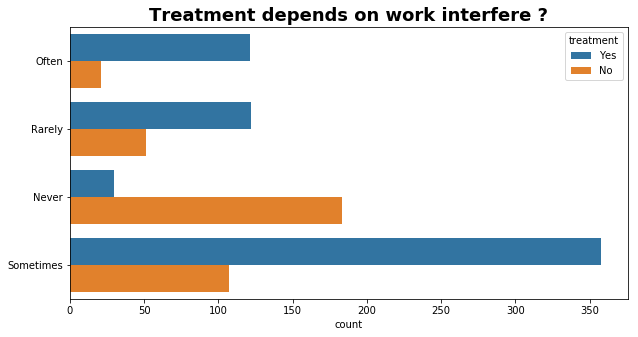

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y="work_interfere", hue="treatment", data=survey)
plt.title("Treatment depends on work interfere ?",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()

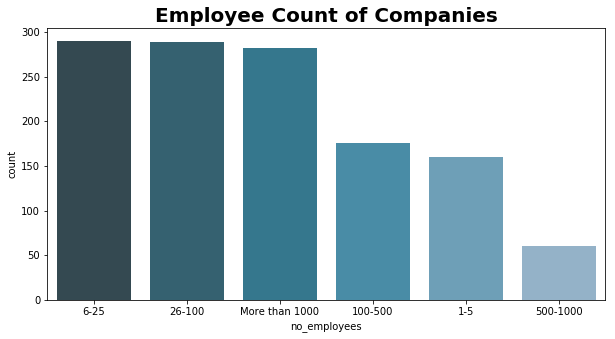

In [15]:
plt.figure(figsize=(10,5))
sns.countplot('no_employees',data = survey, order = survey['no_employees'].value_counts().index,palette="PuBuGn_d")
plt.title("Employee Count of Companies",fontsize=20,fontweight="bold")
plt.show()

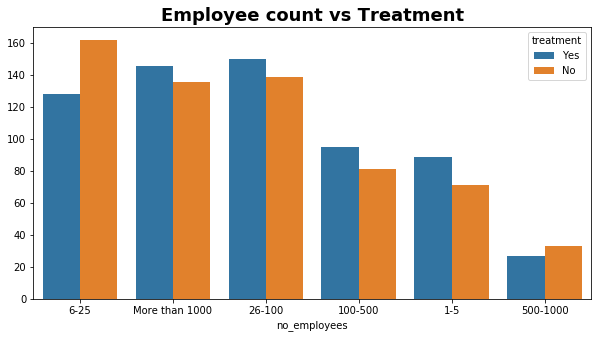

In [16]:
plt.figure(figsize=(10,5))
sns.countplot("no_employees", hue="treatment", data=survey)
plt.title("Employee count vs Treatment",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()

## CONVERTING CATEGORICAL VALUES

In [17]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
for i in survey.columns:
    survey[i] = number.fit_transform(survey[i].astype('str'))

## CORRELATION OF FEATURES

In [18]:
corr=survey.corr()['treatment']
corr[np.argsort(corr,axis=0)[::-1]]

treatment                    1.000000
family_history               0.376714
care_options                 0.235135
benefits                     0.224767
obs_consequence              0.154008
anonymity                    0.140905
mental_health_interview      0.094859
wellness_program             0.092346
seek_help                    0.087700
Country                      0.080096
Age                          0.076312
coworkers                    0.066022
mental_vs_physical           0.060552
leave                        0.059034
phys_health_interview        0.049234
mental_health_consequence    0.027943
remote_work                  0.024593
self_employed                0.012554
phys_health_consequence     -0.012776
tech_company                -0.032295
work_interfere              -0.034404
supervisor                  -0.037944
no_employees                -0.047733
state                       -0.099801
Gender                      -0.149882
Name: treatment, dtype: float64

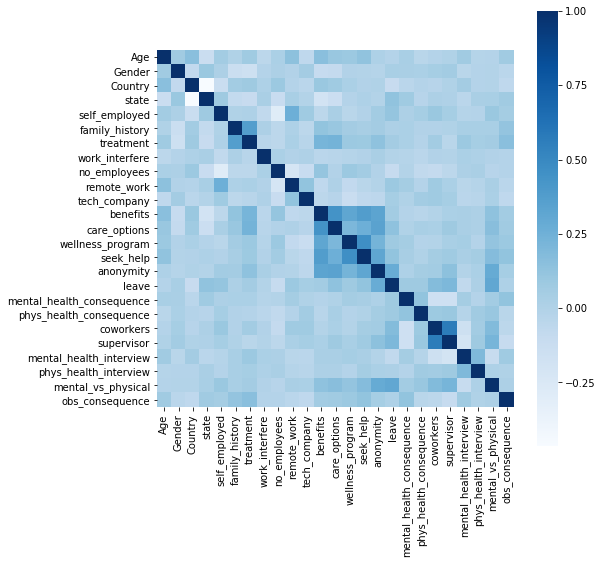

In [19]:
features_correlation = survey.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

__benefits,care_options,wellness_program,seek_help and anonymity__ are correalated with each other and same with __coworkers and supervisor__ 

## FITTING XGBOOST 

splitting the data

In [20]:
from sklearn.model_selection import train_test_split
X = survey.drop(['treatment','benefits','wellness_program','seek_help','anonymity','supervisor'], axis=1)
y = survey.treatment
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('ACCURACY : ',accuracy*100,'%')

ACCURACY :  83.0687830688 %


## FEATURE'S IMPORTANCE

Age = 0.173078
Gender = 0.0167074
Country = 0.0718483
state = 0.143887
self_employed = 0.00794079
family_history = 0.0348124
work_interfere = 0.0772163
no_employees = 0.0841089
remote_work = 0.0267764
tech_company = 0.0113077
care_options = 0.0622558
leave = 0.0782327
mental_health_consequence = 0.0544738
phys_health_consequence = 0.0138487
coworkers = 0.0338278
mental_health_interview = 0.00775021
phys_health_interview = 0.0508528
mental_vs_physical = 0.0402122
obs_consequence = 0.010863


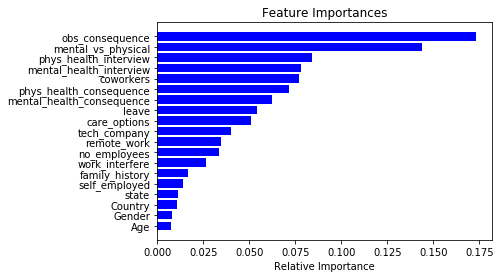

In [22]:
features = X.columns
for name, importance in zip(features, xgb.feature_importances_):
    print(name, "=", importance)

importances = xgb.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) 
plt.xlabel('Relative Importance')
plt.show()

## EVALUATING THE MODEL

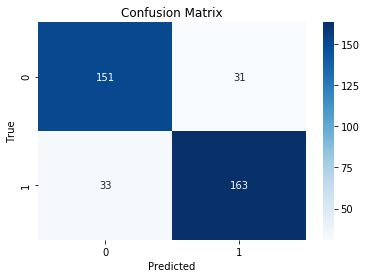

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt='',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()